<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/19_06_23_VGG_binary_fire_model_dry_creek_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG-16 based binary fire classifier

# Binary classifier based of VGG-16 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/FireVideo/vgg-16-binary-fire-classifier.h5')
model.summary()

Using TensorFlow backend.
W0623 20:16:02.346947 139637949667200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 20:16:02.400897 139637949667200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 20:16:02.446837 139637949667200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 20:16:03.109349 139637949667200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0623 20:16:03.110705 13

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


# Let's run the model on images it has never seen

In [4]:
from skimage import transform,io
import numpy as np
import os

#Load the images
dir = '/content/gdrive/My Drive/FireVideo/dry_creek/dry_creek_1fps/'
images = np.array([io.imread(dir+f) for f in os.listdir(dir)])
print(images.shape)

(264, 1080, 1920, 3)


In [0]:
resized_images = np.array([transform.resize(i, (150,150), mode='symmetric') for i in images]) #probs not my greatest numpy code...

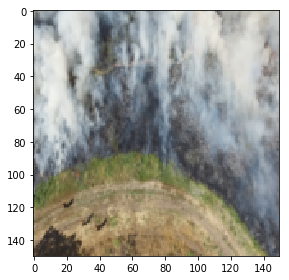

In [6]:
io.imshow(resized_images[0])

In [0]:
predictions = model.predict(resized_images)

# False positives

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


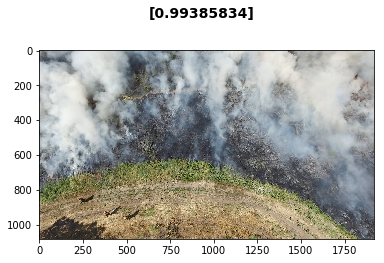

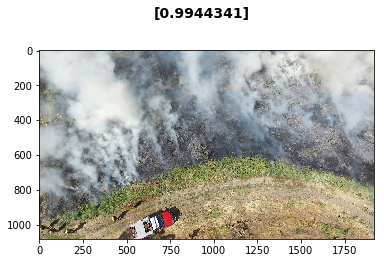

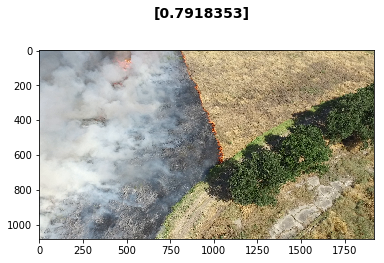

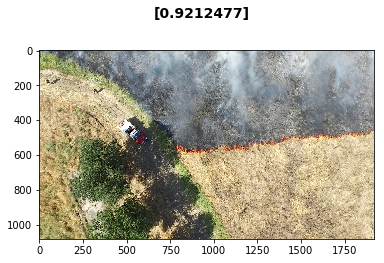

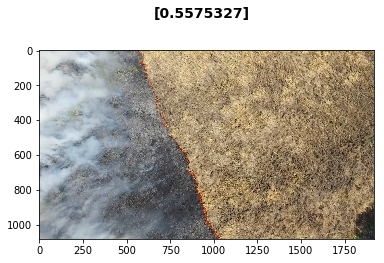

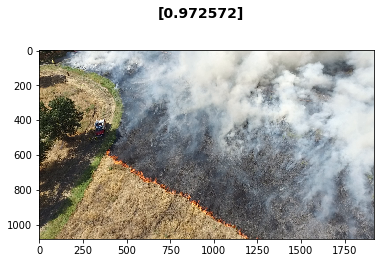

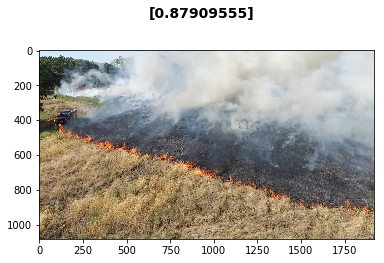

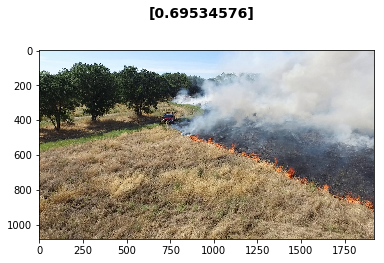

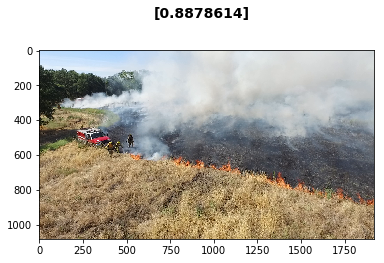

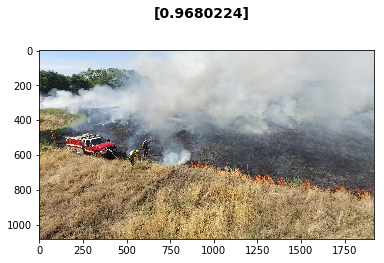

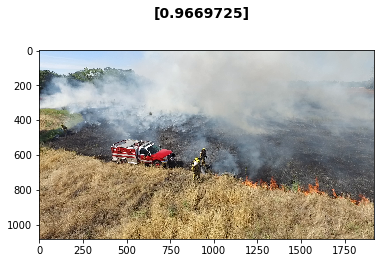

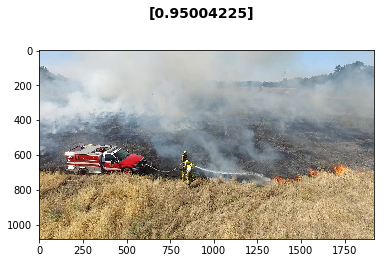

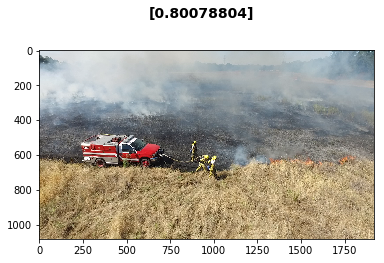

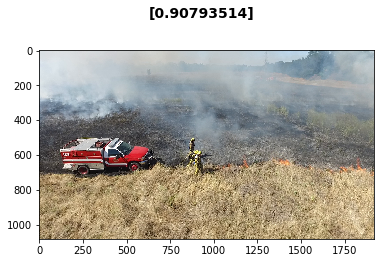

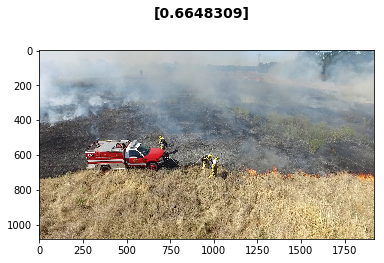

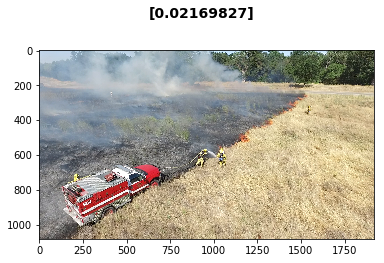

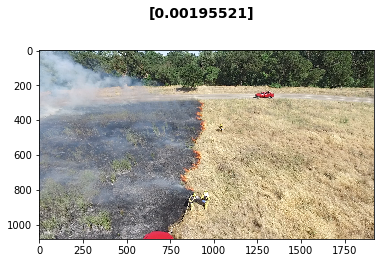

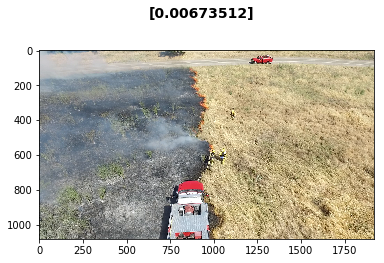

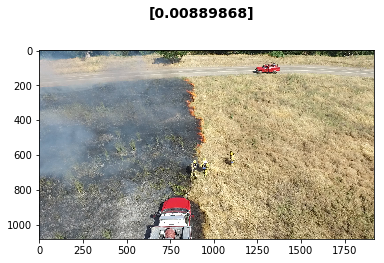

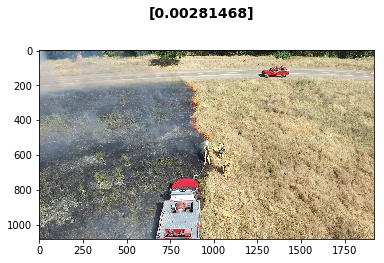

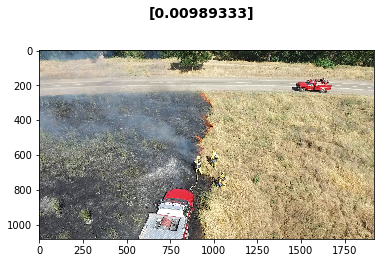

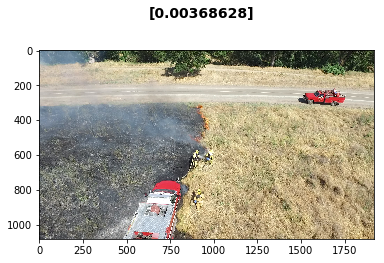

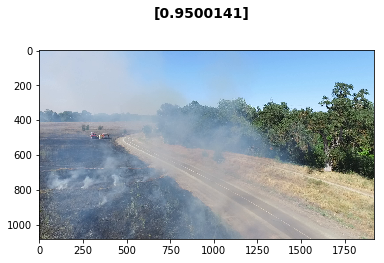

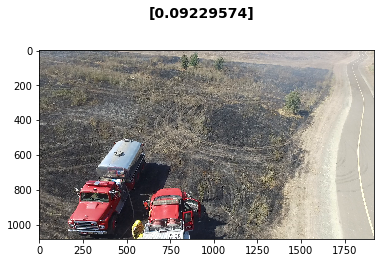

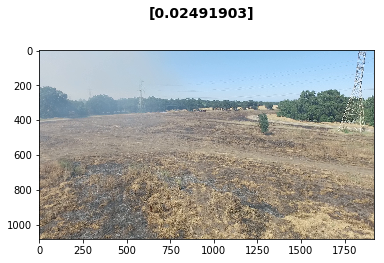

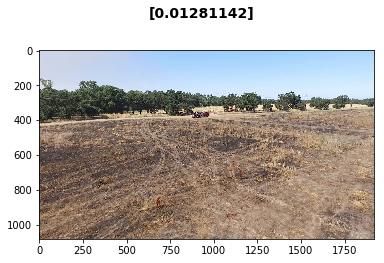

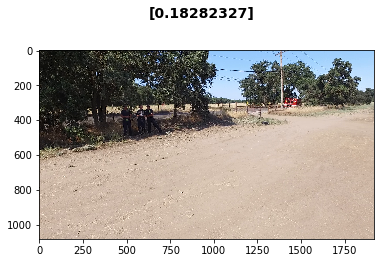

In [12]:
import matplotlib.pyplot as plt

for idx, pred in enumerate(predictions):
  if idx%10 != 0: continue
  fig = plt.figure()
  fig.suptitle(pred, fontsize=14, fontweight='bold')
  plt.imshow(images[idx])

plt.show()

## It looks like the model is more sensitive to smoke, rather than to flames.
This makes sense, because in positive samples there's always smoke, but not always flames.
Moreover, it seems that the model struggles when the smoke is flat rather than 'textured'.
